In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\customer_churn_dataset-training-master.csv')

In [3]:
data.shape

(440833, 12)

In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [6]:
data['Subscription Type'].unique()

array(['Standard', 'Basic', 'Premium', nan], dtype=object)

In [7]:
data['Contract Length'].unique()

array(['Annual', 'Monthly', 'Quarterly', nan], dtype=object)

In [8]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
data.dropna(how='all', axis=0, inplace=True)

In [10]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [11]:
data.drop('CustomerID',axis=1, inplace=True)

In [12]:
gender_dict={'Female':0,'Male':1}
data['Gender']=data['Gender'].apply(lambda x: gender_dict[x])
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
data=pd.get_dummies(data, drop_first=True)

In [14]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,True,False,False
1,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,True,False
2,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,True
3,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,True,False
4,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,False,True,False


In [15]:
data['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

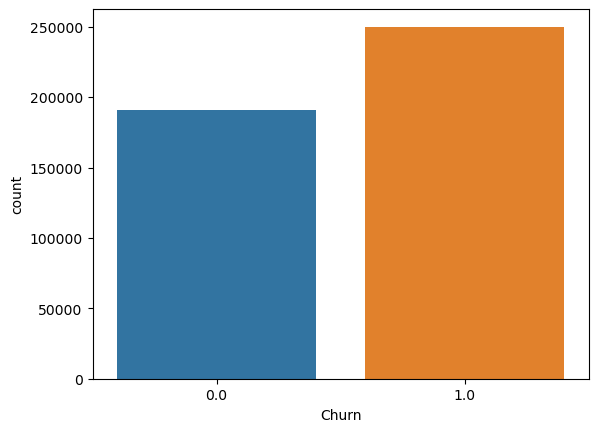

In [16]:
sns.countplot(data=data, x='Churn')

In [17]:
X=data.drop('Churn',axis=1)
y=data['Churn']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [23]:
X_train

array([[ 0.21037671,  0.87210144,  0.85527121, ...,  1.39853353,
        -0.49691884, -0.81756779],
       [-0.51278391, -1.1466556 ,  0.68145459, ...,  1.39853353,
        -0.49691884, -0.81756779],
       [-1.07524218, -1.1466556 , -1.05671167, ..., -0.7150347 ,
        -0.49691884,  1.22314016],
       ...,
       [ 0.61213262,  0.87210144,  0.68145459, ..., -0.7150347 ,
        -0.49691884, -0.81756779],
       [-0.43243273, -1.1466556 , -1.6940393 , ..., -0.7150347 ,
        -0.49691884,  1.22314016],
       [ 1.01388852,  0.87210144, -1.17258942, ..., -0.7150347 ,
         2.01240106, -0.81756779]])

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred1=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred1)

0.8930892510803362

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
precision_score(y_test, y_pred1)

0.922311503393147

In [30]:
recall_score(y_test, y_pred1)

0.88612

In [31]:
f1_score(y_test, y_pred1)

0.9038536077847366

# SVM

In [32]:
from sklearn import svm


In [33]:
svm=svm.SVC()

In [34]:
svm.fit(X_train, y_train)

SVC()

In [35]:
y_pred2=svm.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred2)

0.9790397767872333

In [37]:
precision_score(y_test, y_pred1)

0.922311503393147

# KNeighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn= KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred3=knn.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred3)

0.9596901334966598

In [43]:
precision_score(y_test, y_pred3)

0.9982834828133716


# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt=DecisionTreeClassifier()

In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred4=dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred4)

0.9998412104302064

In [49]:
precision_score(y_test, y_pred4)

0.9999599919983997

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred5=dt.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred5)

0.9998412104302064

In [55]:
precision_score(y_test, y_pred5)

0.9999599919983997

# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc=GradientBoostingClassifier()

In [58]:
y_pred6=dt.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred6)

0.9998412104302064

In [60]:
precision_score(y_test, y_pred6)

0.9999599919983997

In [61]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                         'ACC':[accuracy_score(y_test, y_pred1),
                                accuracy_score(y_test, y_pred2),
                                accuracy_score(y_test, y_pred3),
                                accuracy_score(y_test, y_pred4),
                                accuracy_score(y_test, y_pred5),
                                accuracy_score(y_test, y_pred6)]})

In [62]:
final_data

,Models,ACC
0,LR,0.893089
1,SVC,0.979040
2,KNN,0.959690
3,DT,0.999841
4,RF,0.999841
5,GBC,0.999841


<Axes: xlabel='Models', ylabel='ACC'>

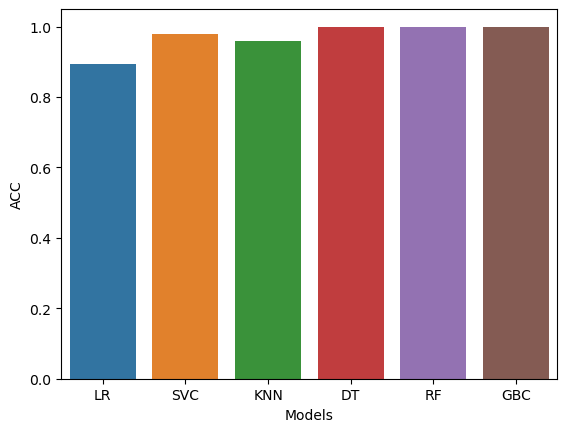

In [63]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [64]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                        'PRE':[precision_score(y_test, y_pred1),
                              precision_score(y_test, y_pred2),
                              precision_score(y_test, y_pred3),
                              precision_score(y_test, y_pred4),
                              precision_score(y_test, y_pred5),
                              precision_score(y_test, y_pred6)]})

In [65]:
final_data

,Models,PRE
0,LR,0.922312
1,SVM,0.996351
2,KNN,0.998283
3,DT,0.999960
4,RF,0.999960
5,GB,0.999960


<Axes: xlabel='Models', ylabel='PRE'>

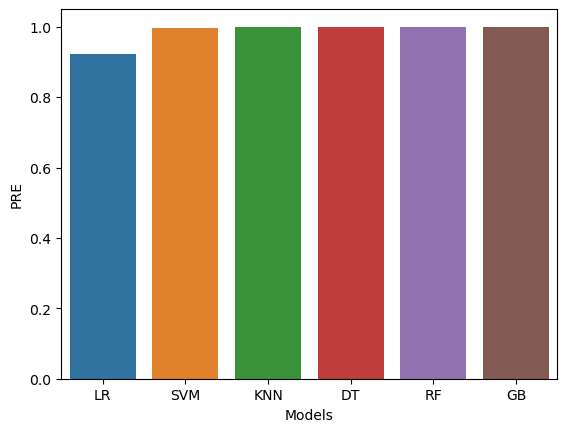

In [66]:
sns.barplot(x=final_data['Models'],y=final_data["PRE"])

In [67]:
import joblib

In [68]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [69]:
model=joblib.load('churn_predict_model')

In [70]:
data.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [72]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,True,False,False
1,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,True,False
2,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,True
3,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,True,False
4,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,False,True,False


In [73]:
model.predict([[57,1,30,10,8,15,715,22,True,False,True,False]])

array([1.])